### Observations
-  BBC has the highest overall sentiment
-  CNN has the lowest overall sentiment
-  FOX seems to have the most neutral sentiment

In [1]:
import os
import tweepy
import json
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
file_name = "api_keys.json"
data = api_keys = json.load(open("c:/Users/charl/Desktop/APIKeys/api_keys.json"))

gkey = data['google_places_api_key']
consumer_key = data['twitter_consumer_key']
consumer_secret = data['twitter_consumer_secret']
access_token = data['twitter_access_token']
access_token_secret = data['twitter_access_token_secret']

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
compound_list = []
positive_list = []
negative_list = []
neutral_list = []


In [5]:
news_networks = ['@BBC', '@CNN', '@CBS', '@FoxNews', '@NYT']


In [6]:
news = []
account =[]
date = []
text =[]
tweet_number=[]
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
for network in news_networks:
    public_tweets = api.search(network, count=100, result_type="recent")
    for tweet in public_tweets['statuses']:
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        news.append(network)
        account.append(tweet['user']['name'])
        date.append(tweet['created_at'])
        text.append(tweet['text'])
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)

In [7]:
df = pd.DataFrame({
    "Network":news,
    "User":account,
    "Date":date,
    "Text":text,
    "Positive":positive_list,
    "Neutral":neutral_list,
    "Negative":negative_list,
    "Compound":compound_list,
})
df = df[['Network','User','Date','Text','Positive','Neutral','Negative','Compound']]


In [8]:
df.to_csv("Twitter_Sentiments.csv")
df = df.sort_values("Date")
df

,Network,User,Date,Text,Positive,Neutral,Negative,Compound
499,@NYT,Chakradhar Mohanta,Thu Feb 22 13:27:46 +0000 2018,"#BhasaAndolanOdisha at #Chhatrapur, Ganjam on ...",0.000,0.849,0.151,-0.4939
498,@NYT,🎗nthropologies||☆||,Thu Feb 22 13:37:56 +0000 2018,"RT @NYT: 28 Years After His Death, a Composer ...",0.000,0.738,0.262,-0.5994
497,@NYT,#ParklandCrisisActors,Thu Feb 22 14:08:42 +0000 2018,@Anthony When are they going to ban @CNN @MSNB...,0.000,0.783,0.217,-0.5574
496,@NYT,N McKeel Petrella,Thu Feb 22 14:10:15 +0000 2018,@rbutler23 @NYT The idea is ludicrous. Fortuna...,0.000,0.800,0.200,-0.3612
495,@NYT,"Jose Tijam, PMP, CSM",Thu Feb 22 14:14:08 +0000 2018,"""Leaping Over the Language Barrier"" via @NYT T...",0.000,0.903,0.097,-0.1280
494,@NYT,thehalpernteam,Thu Feb 22 14:18:03 +0000 2018,"""Homes for Sale in Manhattan and Brooklyn"" by ...",0.000,1.000,0.000,0.0000
493,@NYT,thehalpernteam,Thu Feb 22 14:18:04 +0000 2018,"""Homes for Sale in New York and New Jersey"" by...",0.000,1.000,0.000,0.0000
492,@NYT,thehalpernteam,Thu Feb 22 14:18:05 +0000 2018,"""On the Market in New York and New Jersey"" by ...",0.000,1.000,0.000,0.0000
491,@NYT,thehalpernteam,Thu Feb 22 14:18:05 +0000 2018,"""On the Market in New York City"" by Unknown Au...",0.000,1.000,0.000,0.0000
490,@NYT,Sean Sasso,Thu Feb 22 14:18:10 +0000 2018,"""Homes for Sale in Manhattan and Brooklyn"" via...",0.000,1.000,0.000,0.0000


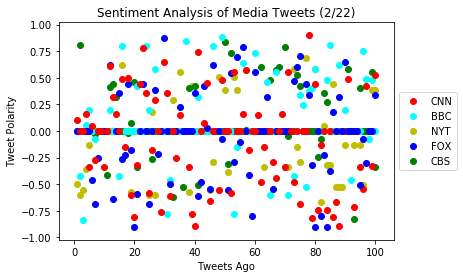

In [9]:
counter1=0
counter2=0
counter3=0
counter4=0
counter5=0

for index, row in df.iterrows():
    if (row["Network"]=="@CNN"):
        counter1 = counter1+1
        CNN = plt.scatter(counter1,row["Compound"],c ='r',marker="o")
    if (row["Network"]=="@NYT"):
        counter2 = counter2+1
        NYT = plt.scatter(counter2,row["Compound"],c ='y',marker="o")
    if (row["Network"]=="@FoxNews"):
        counter3 = counter3+1
        FOX = plt.scatter(counter3,row["Compound"],c ='b',marker="o")
    if (row["Network"]=="@BBC"):
        counter4 = counter4+1
        BBC = plt.scatter(counter4,row["Compound"],c ='cyan',marker="o")
    if (row["Network"]=="@CBS"):
        counter5 = counter5+1
        CBS = plt.scatter(counter5,row["Compound"],c ='g',marker="o")
        
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title("Sentiment Analysis of Media Tweets (2/22)")
plt.legend(handles = [CNN,BBC,NYT,FOX,CBS], labels = ["CNN","BBC","NYT","FOX","CBS"], loc='center left', bbox_to_anchor=(1, 0.5))

sns.set
plt.show()

In [10]:
new_df = pd.DataFrame(df.groupby("Network")["Compound"].mean())
new_df

,Compound
Network,
@BBC,0.082417
@CBS,0.065172
@CNN,-0.066806
@FoxNews,-0.026990
@NYT,-0.039949


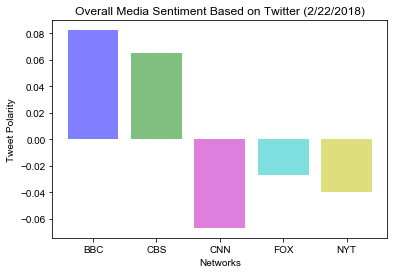

In [11]:
x_axis = np.arange(len(new_df["Compound"]))
compound_score = new_df["Compound"]
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, ["BBC", "CBS", "CNN", "FOX", "NYT"])
plt.bar(x_axis, compound_score, color = ['b','g','m','c','y'], alpha=0.5, align="edge")
plt.xlabel("Networks")
plt.ylabel("Tweet Polarity")
plt.title("Overall Media Sentiment Based on Twitter (2/22/2018)")
sns.set()
plt.show()